# Quick Start

## Installation

### Install TeX and pdf2svg

This is platform-dependent. 

See:
    
- [Texlive](https://www.tug.org/texlive/)
- [pdf2svg](http://www.cityinthesky.co.uk/opensource/pdf2svg/)

### Install itikz

```sh
pip install itikz
```

## Usage

Load itikz. It's a jupter extension.

In [1]:
%load_ext itikz

Create a simple standalone document.

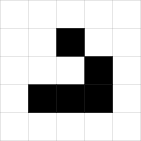

In [2]:
%%itikz
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

The extension:
    
- Writes the cell as a `.tex` file; 
- Runs `pdflatex` on the source;
- Runs `svg2pdf` on the generated pdf;
- Removes the intermediary artifacts.

By default, the filenames are the `md5` hash of the source. The extension uses the hash to see if regeneration is necessessary. If it's not, it just loads the SVG file.

In [3]:
!ls *.svg *.tex

03f400523adb0f7d2fea15f4c4d6ad6e.svg  03f400523adb0f7d2fea15f4c4d6ad6e.tex


This is annoying sometimes if you want to look for a specific file outside of the notebook. So, you can prefix it, attaching semantical meaning.

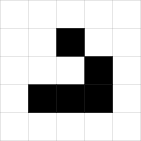

In [4]:
%%itikz --file-prefix conway-

\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

In [5]:
!ls *.svg *.tex

03f400523adb0f7d2fea15f4c4d6ad6e.svg
03f400523adb0f7d2fea15f4c4d6ad6e.tex
conway-04c3ec160176559dffa49ef2ac7746f2.svg
conway-04c3ec160176559dffa49ef2ac7746f2.tex


Of course, writing TikZ files entails lots of tiny tweaks, resulting in a lot of accumulated cruft. For development, you probably want to use your system temp directory to keep your project directory clean.

In [6]:
!rm -f *.svg *.tex

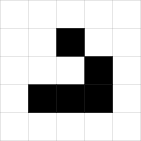

In [7]:
%%itikz --temp-dir --file-prefix conway-

\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

In [8]:
!ls *.svg *.tex

ls: cannot access '*.svg': No such file or directory
ls: cannot access '*.tex': No such file or directory


To make it easier to switch from development to production mode, setting the `ITIKZ_TEMP_DIR` environmental to any value enables `--temp-dir`.

In [9]:
import os
os.environ['ITIKZ_TEMP_DIR'] = '1'

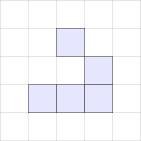

In [10]:
%%itikz --file-prefix conway-
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=blue!10] (1, 1) rectangle (2, 2);
\draw[fill=blue!10] (2, 1) rectangle (3, 2);
\draw[fill=blue!10] (3, 1) rectangle (4, 2);
\draw[fill=blue!10] (3, 2) rectangle (4, 3);
\draw[fill=blue!10] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

In [11]:
!ls *.svg *.tex

ls: cannot access '*.svg': No such file or directory
ls: cannot access '*.tex': No such file or directory


In [12]:
del os.environ['ITIKZ_TEMP_DIR']

Sometimes, you want to generate a TikZ document from a string, rather than a cell. You can do that using the line magic.

In [13]:
conway_str = r"""\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=magenta] (1, 1) rectangle (2, 2);
\draw[fill=magenta] (2, 1) rectangle (3, 2);
\draw[fill=magenta] (3, 1) rectangle (4, 2);
\draw[fill=magenta] (3, 2) rectangle (4, 3);
\draw[fill=magenta] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}"""

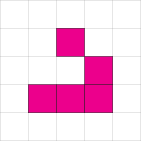

In [14]:
%itikz --temp-dir --file-prefix conway- conway_str

Generally, string-generation is bad. One useful thing you can do without it is use an implicit `tikzpicture` environment. 

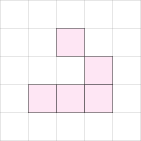

In [15]:
%%itikz --file-prefix implicit-demo- --implicit-pic 
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

Note that the resulting `tex` artifact is a full document so you can use it later when writing a `tex` document.

In [16]:
!cat implicit-demo-a6fdb3ecbc22048b7f090c20b5039b38.tex

\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

In [17]:
!rm implicit-demo*